In [7]:
%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

 # 多変量正規分布モデル
 
$$
    f(x) = \frac{e^{- \frac{1}{2}
    (\boldsymbol{x} - \boldsymbol{\mu})^{\mathrm{T}}\Sigma^{-1}(\boldsymbol{x} - \boldsymbol{\mu})}}
    {(2 \pi)^{\frac{M}{2}} |\Sigma| ^ {\frac{1}{2}}}
$$

In [2]:
# ガウス関数を定義
def multivariate_gauss(x, mu, Sigma):
    return np.exp(- 1 / 2 * np.diag(np.array(x-mu) @ np.linalg.inv(Sigma) @ np.array(x-mu).T)) \
                / np.sqrt((2 * np.pi) ** (x.shape[0]) * np.linalg.det(Sigma))

<IPython.core.display.Javascript object>


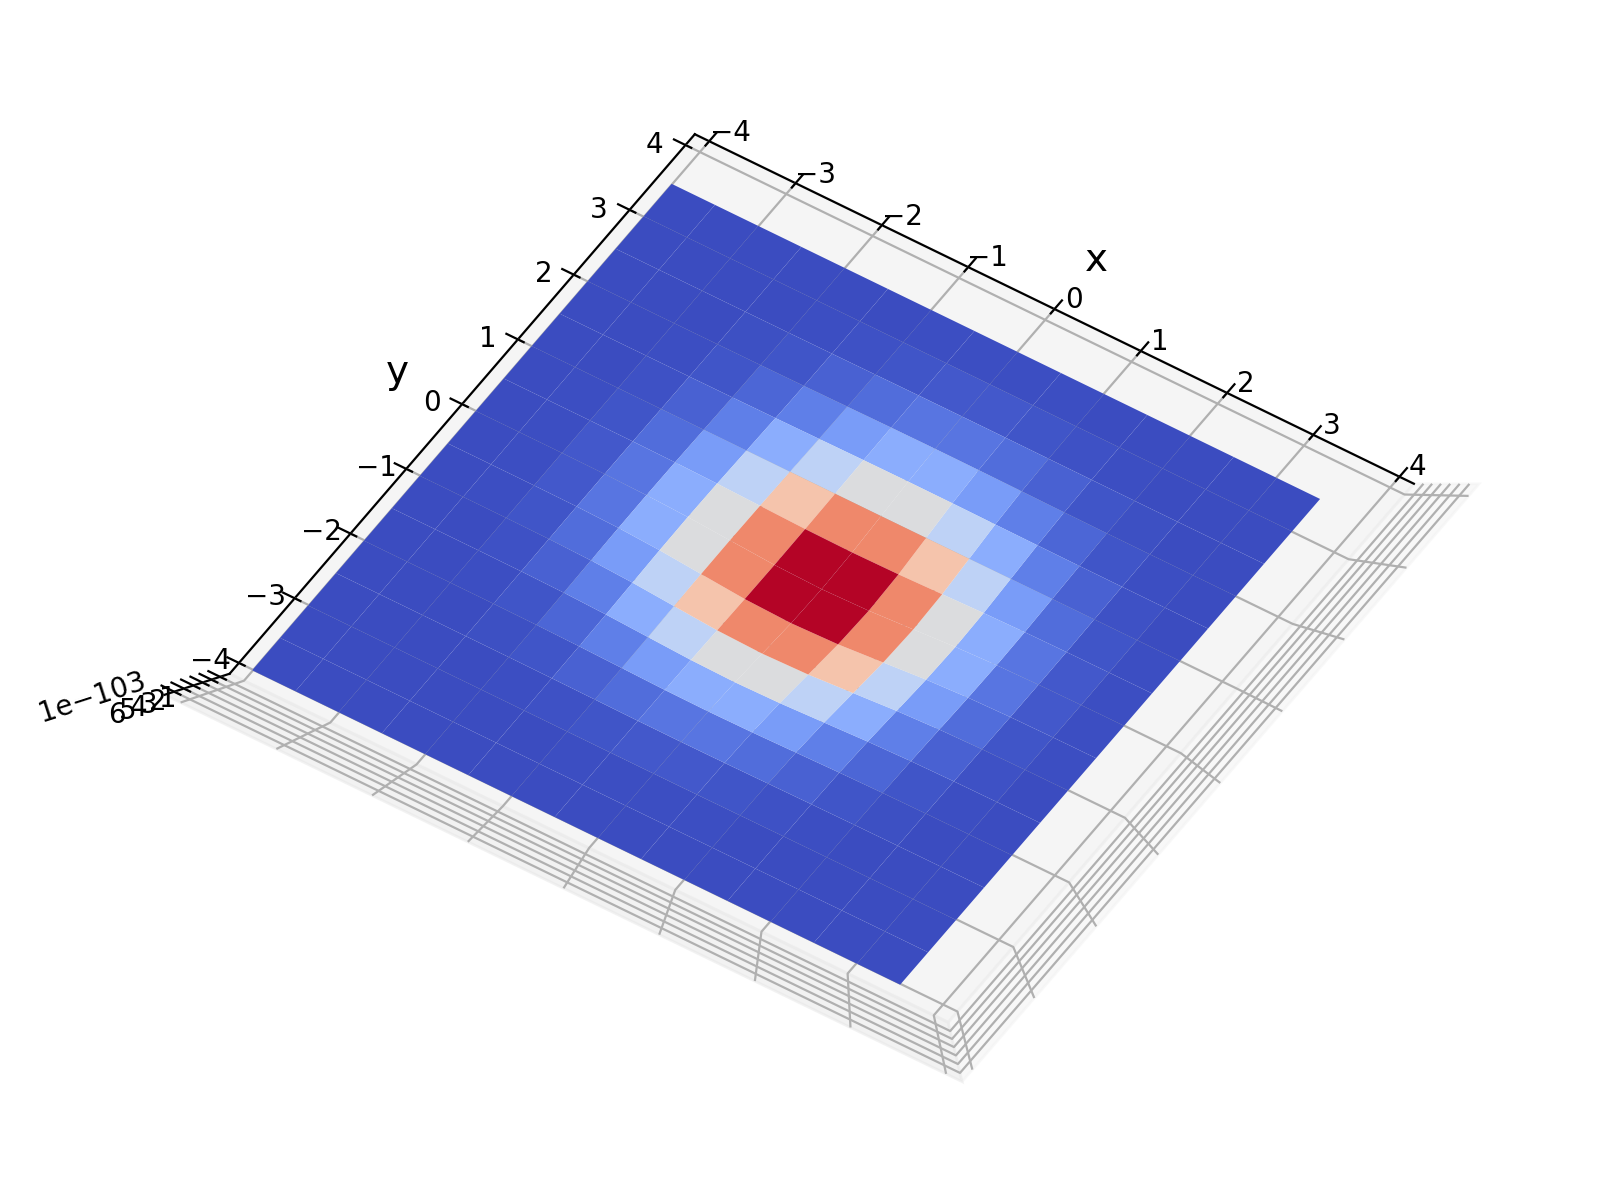

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 2次元正規分布
# 平均
mu = np.array([0, 0])
Sigma = np.array([[1, 0],
                                [0, 1]])
# Figureを作成
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)

# 目盛線を表示
ax.grid()

# 軸範囲を設定
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

# -4～4まで0.1刻みの数値の配列
elem = np.arange(-4, 4, 0.5)
X, Y = np.meshgrid(elem, elem)
z = np.c_[X.ravel(),Y.ravel()]

# 軸ラベルを設定
ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel("y", fontsize = 14)

# グラフに描く関数
Z = multivariate_gauss(z, mu, Sigma)
Z = Z.reshape(X.shape)

# Axesにガウス関数を描画
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.cm.coolwarm, label =  'μ=[0, 0], Σ=[[1,0], [0,1]]')

# 線形回帰モデル

$$
    \boldsymbol{y} = \mathbf{a}^{\mathrm{T}}\mathbf{x} + \epsilon
$$

In [14]:
def linear_func(x, a, epsilon):
    return a.T @ x + epsilon

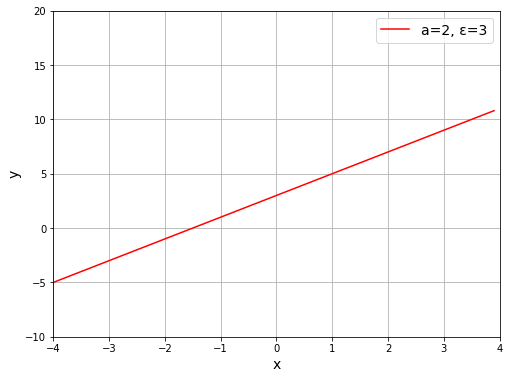

In [15]:
a = [2]
epsilon = [3]

# Figureを作成
fig = plt.figure(figsize = (8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)

# 目盛線を表示
ax.grid()

# 軸範囲を設定
ax.set_xlim([-4, 4])
ax.set_ylim([-10, 20])

# -4～8まで0.1刻みの数値の配列
x = np.arange(-4, 4, 0.1)

# 軸ラベルを設定
ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel("y", fontsize = 14)

# グラフに描く関数
f = linear_regression(x, a, epsilon)

# Axesにガウス関数を描画
ax.plot(x, f, color = "red", label =  "a=2, ε=3")

# 凡例の表示
ax.legend(fontsize = 14)

# 自動関連度決定モデル

$$
     \boldsymbol{y} = \boldsymbol{X} \boldsymbol{a} + \epsilon 
$$